# Handwritten digit recognition

Let's try a new application of the techniques learned in the previous lectures. We have a good grasp of principal component analysis (PCA) and stochastic gradient descent (SGD) linear classifier that we applied to classify the species of iris flowers. Today, we will apply these techniques to a dataset containing images of hand written digits (0,1,..,9) which is a higher-dimensional dataset. 

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()

The `load_digits` dataset contains 1797 examples of digits, each stored as a 8x8 matrix. Each matrix element can be thought of as a pixel. In each pixel we have a number ranging from 0 to 16. Zero stands for the black background of the image and 16 means it's a bright white pixel in the image. 

In [3]:
print (digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [5]:
print(digits.data.shape)  # 1797 rows and 64 columns (recall, iris dataset has 150 rows and 4 columns)

(1797, 64)


In [6]:
print(digits.target.shape)

(1797,)


In [7]:
print(digits.target[0:30]) # Let's check some of the targets

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [8]:
print(digits.frame) # Not sure why this key is included

None


In [9]:
print(digits.feature_names) # Each feature is a pixel, so this contains name for each pixel. 

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [10]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [11]:
print(digits.images.shape)

(1797, 8, 8)


Let's print some of the images and see how they look like.

In [12]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [13]:
print(digits.images[5])

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


Instead of printing as numbers, we can convert each number into a color in the white-to-black scale and visualize a black-and-white image.

## Visualizing image datasets

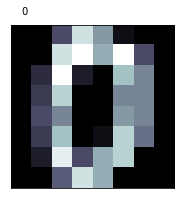

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,str(digits.target[0]))  # print target at x = 0, y = -1

# the 'bone' color map gives us a palette that can be used for a B&W image
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
p.imshow(digits.images[0], cmap=plt.cm.bone, interpolation='nearest')

Let's print the first 10 images in the dataset as a 2x5 matrix.

In [15]:
def print_digits(images, y, max_n=10):
    
    n_row, n_col = 2, 5
    
    fig = plt.figure(figsize=(3 * n_col, 3 * n_row))
    
    i=0
    while i < max_n and i < images.shape[0]:
        p=fig.add_subplot(n_row, n_col, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        p.text(0,-1,str(y[i]))
        i=i+1

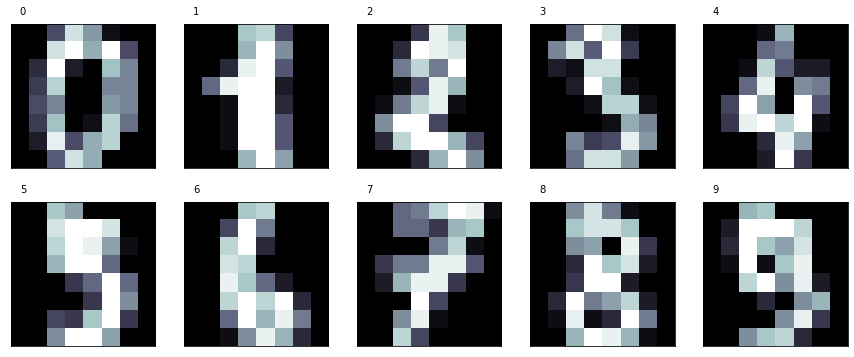

In [16]:
print_digits(digits.images, digits.target, max_n=10)

## PCA with training and testing

In [17]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = digits.data     # matrix
y = digits.target   # vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data (features) w.r.t. the mean and standard deviation of the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # here 'fit_transform'
X_test = sc.transform(X_test)        # here only 'transform' as we are applying the same transformation

pca_2c_model = PCA(n_components=2)   # Mode with the first 2 principal components

X_train = pca_2c_model.fit_transform(X_train)  # Training phase in PCA
X_test = pca_2c_model.transform(X_test)        # Test phase / prediction phase in PCA

Recall, for the PCA model, we can find out what fraction of the information is captured by the principal components using the score `explained_variance_ration_`. See DS_04 for an explanation. 

In [18]:
print('Explained variance is \n',pca_2c_model.explained_variance_ratio_)

Explained variance is 
 [0.12164624 0.09634853]


For the iris dataset, the first pricipal component had over 94% of information, but for the digits dataset, the fist principal component has only 12% of the information. This is because the the features in the digits dataset are less correlated. 

/Users/raghurama/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/raghurama/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


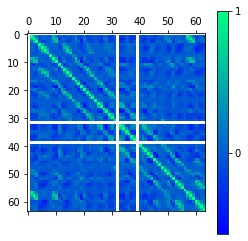

In [19]:
digits_covariance=np.corrcoef(digits.data.T)
corr_plot=plt.matshow(digits_covariance,cmap=plt.cm.winter)
plt.colorbar(corr_plot,ticks=[-1,0,+1])

The band structure is probably because the images of all digits have a black background at the border. So, these pixels are correlated, which implies that they are all always black. The white stripes are probably due to `nan` arising due to division by zero. Recall, correlation coefficient involves dividing by the standard deviation!

We can make a scatterplot of the two principal components and see if they can classify the digits into separate regions as in a map.

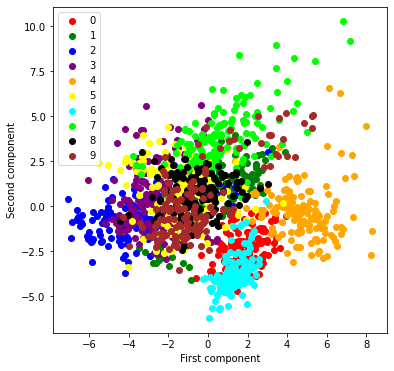

In [20]:
import matplotlib.pyplot as plt
colors_list=['red','green','blue','purple','orange','yellow','cyan','lime','black','brown']
fig, axes = plt.subplots(figsize=(6,6))
for i in range(len(colors_list)):
    xs=X_train[:,0][y_train==i]
    ys=X_train[:,1][y_train==i]
    axes.scatter(xs,ys,c=colors_list[i])
plt.legend(digits.target_names)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

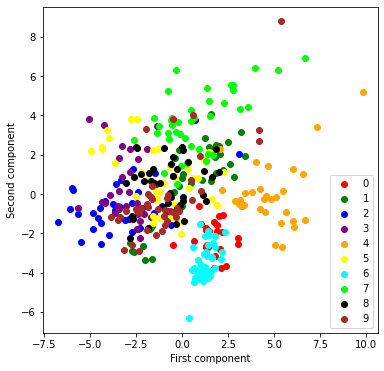

In [21]:
import matplotlib.pyplot as plt
colors_list=['red','green','blue','purple','orange','yellow','cyan','lime','black','brown']
fig, axes = plt.subplots(figsize=(6,6))
for i in range(len(colors_list)):
    xs=X_test[:,0][y_test==i]
    ys=X_test[:,1][y_test==i]
    axes.scatter(xs,ys,c=colors_list[i])
plt.legend(digits.target_names)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

Overall, visually, we see that the model's performance is similar in the test set (as in the training set). However, the very small values of `explained_variance_ratio_` that we have seen is not sufficient for accurate classification.

## Model convergence with increasing principal components

In [22]:
for n in range(1,65):
    
    X = digits.data     
    y = digits.target   

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test)       

    pca_nc_model = PCA(n_components=n)  

    X_train = pca_nc_model.fit_transform(X_train)  
    X_test = pca_nc_model.transform(X_test)        
    

    score=pca_nc_model.explained_variance_ratio_.sum()
    print("By retaining ", n, "components in PCA, we get a score of", score)

By retaining  1 components in PCA, we get a score of 0.12164623607516281
By retaining  2 components in PCA, we get a score of 0.2179947642306473
By retaining  3 components in PCA, we get a score of 0.30377809970692343
By retaining  4 components in PCA, we get a score of 0.3683483642504799
By retaining  5 components in PCA, we get a score of 0.4173279779934533
By retaining  6 components in PCA, we get a score of 0.4591603138623506
By retaining  7 components in PCA, we get a score of 0.49843399436769675
By retaining  8 components in PCA, we get a score of 0.5312619202767146
By retaining  9 components in PCA, we get a score of 0.5609929919395923
By retaining  10 components in PCA, we get a score of 0.5890224631515673
By retaining  11 components in PCA, we get a score of 0.6165046532052981
By retaining  12 components in PCA, we get a score of 0.6425003557760436
By retaining  13 components in PCA, we get a score of 0.6656118544805582
By retaining  14 components in PCA, we get a score of 0.6

We see that to get a score of >0.95, we need to include at least 40 principal components. This conveys why image compression without loosing information is a difficult task.

## Let's play with a hand-written digit

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

Here's an actual image. You can try this example with you own image that you can click with your phone and upload to `../images/handwritten/` folder.

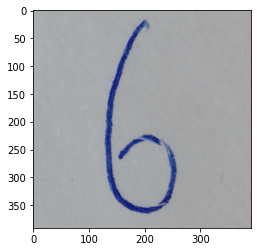

In [24]:
my_img=Image.open('../images/handwritten/digit_6.jpeg')
plt.imshow(my_img)
plt.show()

The colors will be stored in 3 channels (for rgb?) but for this exercise we need a grayscale image.

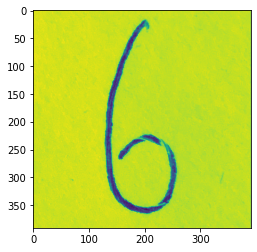

In [25]:
my_img=Image.open('../images/handwritten/digit_6.jpeg').convert('L')
plt.imshow(my_img)
plt.show()

Let's resize the image into 8x8 pixels.

In [26]:
img8x8=my_img.resize((8,8),Image.BILINEAR)

In [27]:
img = np.array(img8x8,dtype=float)
img.shape

(8, 8)

In [28]:
img

array([[171., 170., 169., 157., 161., 167., 166., 166.],
       [171., 170., 168., 147., 165., 167., 167., 166.],
       [171., 170., 159., 151., 166., 167., 167., 166.],
       [170., 170., 154., 157., 165., 165., 166., 166.],
       [169., 170., 151., 150., 153., 163., 165., 166.],
       [169., 170., 151., 149., 155., 154., 164., 166.],
       [169., 169., 156., 149., 152., 153., 164., 165.],
       [168., 169., 167., 147., 146., 161., 165., 165.]])

The following steps show how you can scale the img to the new range 0..16.

Our goal is to scale the matrix in the range 171-146 to the new range 0-16.

In [29]:
OldMax=np.max(img)
OldMin=np.min(img)
NewMax=0
NewMin=16
OldRange = OldMax - OldMin 
NewRange = NewMax - NewMin
img= (((img - OldMin) * NewRange) / OldRange) + NewMin
img

array([[ 0.  ,  0.64,  1.28,  8.96,  6.4 ,  2.56,  3.2 ,  3.2 ],
       [ 0.  ,  0.64,  1.92, 15.36,  3.84,  2.56,  2.56,  3.2 ],
       [ 0.  ,  0.64,  7.68, 12.8 ,  3.2 ,  2.56,  2.56,  3.2 ],
       [ 0.64,  0.64, 10.88,  8.96,  3.84,  3.84,  3.2 ,  3.2 ],
       [ 1.28,  0.64, 12.8 , 13.44, 11.52,  5.12,  3.84,  3.2 ],
       [ 1.28,  0.64, 12.8 , 14.08, 10.24, 10.88,  4.48,  3.2 ],
       [ 1.28,  1.28,  9.6 , 14.08, 12.16, 11.52,  4.48,  3.84],
       [ 1.92,  1.28,  2.56, 15.36, 16.  ,  6.4 ,  3.84,  3.84]])

In [30]:
img=np.rint(img)
print(img)

[[ 0.  1.  1.  9.  6.  3.  3.  3.]
 [ 0.  1.  2. 15.  4.  3.  3.  3.]
 [ 0.  1.  8. 13.  3.  3.  3.  3.]
 [ 1.  1. 11.  9.  4.  4.  3.  3.]
 [ 1.  1. 13. 13. 12.  5.  4.  3.]
 [ 1.  1. 13. 14. 10. 11.  4.  3.]
 [ 1.  1. 10. 14. 12. 12.  4.  4.]
 [ 2.  1.  3. 15. 16.  6.  4.  4.]]


We can now plot this matrix as we have plotted the digits above.

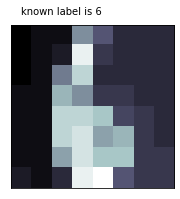

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 6')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

## Let's train on all examples in `digits` and predict the label of our image using SGD classifier

Since each image is represented by 64 features, we have to convert our matrix into a vector with 64 columns.

In [32]:
img_fl=np.reshape(img,[1,64])
img_fl.shape

(1, 64)

In [33]:
print(img_fl,digits.data[0] )

[[ 0.  1.  1.  9.  6.  3.  3.  3.  0.  1.  2. 15.  4.  3.  3.  3.  0.  1.
   8. 13.  3.  3.  3.  3.  1.  1. 11.  9.  4.  4.  3.  3.  1.  1. 13. 13.
  12.  5.  4.  3.  1.  1. 13. 14. 10. 11.  4.  3.  1.  1. 10. 14. 12. 12.
   4.  4.  2.  1.  3. 15. 16.  6.  4.  4.]] [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [34]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = digits.data     
y = digits.target 

sc = StandardScaler()
X = sc.fit_transform(X)

clf_model=SGDClassifier() # we are using all features
clf_model.fit(X, y)

SGDClassifier()

In [35]:
y_pred=clf_model.predict(X)
print(metrics.classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       177
           1       0.96      0.98      0.97       179
           2       0.99      1.00      0.99       175
           3       0.97      0.99      0.98       179
           4       1.00      1.00      1.00       181
           5       0.99      0.99      0.99       182
           6       0.99      1.00      0.99       179
           7       0.99      1.00      1.00       178
           8       0.97      0.91      0.94       186
           9       0.99      0.98      0.99       181

    accuracy                           0.98      1797
   macro avg       0.98      0.99      0.99      1797
weighted avg       0.98      0.98      0.98      1797



The score looks quite good with in the training set. Let's see  if the dataset is good to classify our image.

In [36]:
img_fl = sc.transform(img_fl)
label_img_predicted=clf_model.predict(img_fl)

In [37]:
print(label_img_predicted)

[2]


The label has been wrongy predicted eventhough the performance seems good within the dataset. This is an example of overfitting.  

Another reason could be that in our image the background on the right is not very black and it's a bit greyish. 

In [38]:
print(img)

[[ 0.  1.  1.  9.  6.  3.  3.  3.]
 [ 0.  1.  2. 15.  4.  3.  3.  3.]
 [ 0.  1.  8. 13.  3.  3.  3.  3.]
 [ 1.  1. 11.  9.  4.  4.  3.  3.]
 [ 1.  1. 13. 13. 12.  5.  4.  3.]
 [ 1.  1. 13. 14. 10. 11.  4.  3.]
 [ 1.  1. 10. 14. 12. 12.  4.  4.]
 [ 2.  1.  3. 15. 16.  6.  4.  4.]]


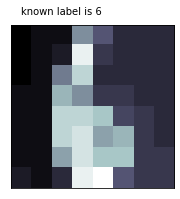

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 6')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

In [40]:
print(digits.images[6]) # Data for '6' from the data set

[[ 0.  0.  0. 12. 13.  0.  0.  0.]
 [ 0.  0.  5. 16.  8.  0.  0.  0.]
 [ 0.  0. 13. 16.  3.  0.  0.  0.]
 [ 0.  0. 14. 13.  0.  0.  0.  0.]
 [ 0.  0. 15. 12.  7.  2.  0.  0.]
 [ 0.  0. 13. 16. 13. 16.  3.  0.]
 [ 0.  0.  7. 16. 11. 15.  8.  0.]
 [ 0.  0.  1.  9. 15. 11.  3.  0.]]


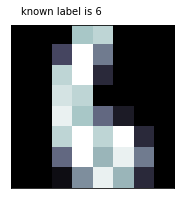

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 6')  

p.imshow(digits.images[6], cmap=plt.cm.bone, interpolation='nearest')

So, let's sharpen our image.

In [42]:
img[:,0:2]=0
img[:,7:8]=0
img

array([[ 0.,  0.,  1.,  9.,  6.,  3.,  3.,  0.],
       [ 0.,  0.,  2., 15.,  4.,  3.,  3.,  0.],
       [ 0.,  0.,  8., 13.,  3.,  3.,  3.,  0.],
       [ 0.,  0., 11.,  9.,  4.,  4.,  3.,  0.],
       [ 0.,  0., 13., 13., 12.,  5.,  4.,  0.],
       [ 0.,  0., 13., 14., 10., 11.,  4.,  0.],
       [ 0.,  0., 10., 14., 12., 12.,  4.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  4.,  0.]])

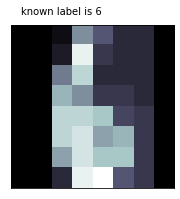

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 6')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

In [44]:
img_fl=np.reshape(img,[1,64])

img_fl = sc.transform(img_fl)
label_img_predicted=clf_model.predict(img_fl)

print(label_img_predicted)

[8]


After manually sharpening the image, we have predicted the label correctly! 

Try this code with your own image and let me know how it worked.

## Student images

[4]


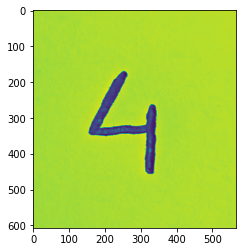

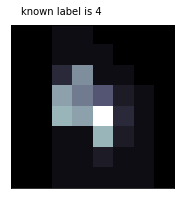

In [45]:
from PIL import Image
import matplotlib.pyplot as plt
my_img=Image.open('../images/handwritten/4_PB.jpeg').convert('L')
plt.imshow(my_img)
img8x8=my_img.resize((8,8),Image.BILINEAR)
img = np.array(img8x8,dtype=float)

OldMax=np.max(img)
OldMin=np.min(img)
NewMax=0
NewMin=16
OldRange = OldMax - OldMin 
NewRange = NewMax - NewMin
img= (((img - OldMin) * NewRange) / OldRange) + NewMin

img=np.rint(img)

img[:,0:2]=0
img[:,7:8]=0
img

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 4')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

img_fl=np.reshape(img,[1,64])

img_fl = sc.transform(img_fl)
label_img_predicted=clf_model.predict(img_fl)

print(label_img_predicted)

[4]


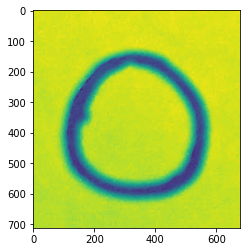

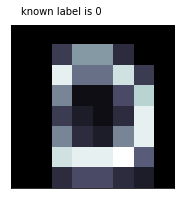

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
my_img=Image.open('../images/handwritten/0_HN.png').convert('L')
plt.imshow(my_img)
img8x8=my_img.resize((8,8),Image.BILINEAR)
img = np.array(img8x8,dtype=float)

OldMax=np.max(img)
OldMin=np.min(img)
NewMax=0
NewMin=16
OldRange = OldMax - OldMin 
NewRange = NewMax - NewMin
img= (((img - OldMin) * NewRange) / OldRange) + NewMin

img=np.rint(img)

img[:,0:2]=0
img[:,7:8]=0
img

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 0')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

img_fl=np.reshape(img,[1,64])

img_fl = sc.transform(img_fl)
label_img_predicted=clf_model.predict(img_fl)

print(label_img_predicted)

[4]


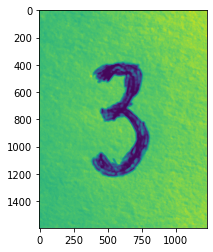

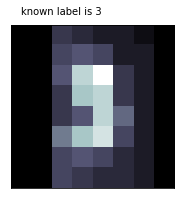

In [47]:
from PIL import Image
import matplotlib.pyplot as plt
my_img=Image.open('../images/handwritten/new3_vm.jpeg').convert('L')
plt.imshow(my_img)
img8x8=my_img.resize((8,8),Image.BILINEAR)
img = np.array(img8x8,dtype=float)

OldMax=np.max(img)
OldMin=np.min(img)
NewMax=0
NewMin=16
OldRange = OldMax - OldMin 
NewRange = NewMax - NewMin
img= (((img - OldMin) * NewRange) / OldRange) + NewMin

img=np.rint(img)

img[:,0:2]=0
img[:,7:8]=0
img

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 3')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

img_fl=np.reshape(img,[1,64])

img_fl = sc.transform(img_fl)
label_img_predicted=clf_model.predict(img_fl)

print(label_img_predicted)

[8]


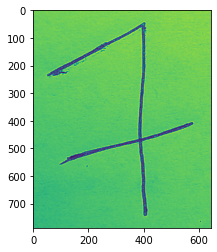

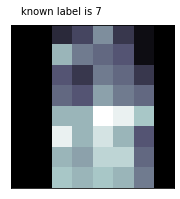

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
my_img=Image.open('../images/handwritten/7_ap.png').convert('L')
plt.imshow(my_img)
img8x8=my_img.resize((8,8),Image.BILINEAR)
img = np.array(img8x8,dtype=float)

OldMax=np.max(img)
OldMin=np.min(img)
NewMax=0
NewMin=16
OldRange = OldMax - OldMin 
NewRange = NewMax - NewMin
img= (((img - OldMin) * NewRange) / OldRange) + NewMin

img=np.rint(img)

img[:,0:2]=0
img[:,7:8]=0
img

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
p=fig.add_subplot(xticks=[], yticks=[])

p.text(0,-1,'known label is 7')  

p.imshow(img, cmap=plt.cm.bone, interpolation='nearest')

img_fl=np.reshape(img,[1,64])

img_fl = sc.transform(img_fl)
label_img_predicted=clf_model.predict(img_fl)

print(label_img_predicted)